=== 평균 복구 지연 (RERR → RREP) ===
[Node 6] Legacy: 0.455418초 | Proposed: 0.005407초
[Node 7] Legacy: 0.495536초 | Proposed: 0.091560초
[Node 17] Legacy: 2.935552초 | Proposed: 0.985954초
[Node 18] Legacy: 4.915075초 | Proposed: 1.405272초
[Node 21] Legacy: 0.458245초 | Proposed: 1.108548초
[Node 22] Legacy: 0.408984초 | Proposed: 0.498687초
[Node 24] Legacy: 1.223288초 | Proposed: 0.517789초
[Node 26] Legacy: 0.174296초 | Proposed: 1.919296초
[Node 27] Legacy: 1.506151초 | Proposed: 1.081914초
[Node 29] Legacy: 17.608270초 | Proposed: 0.335730초


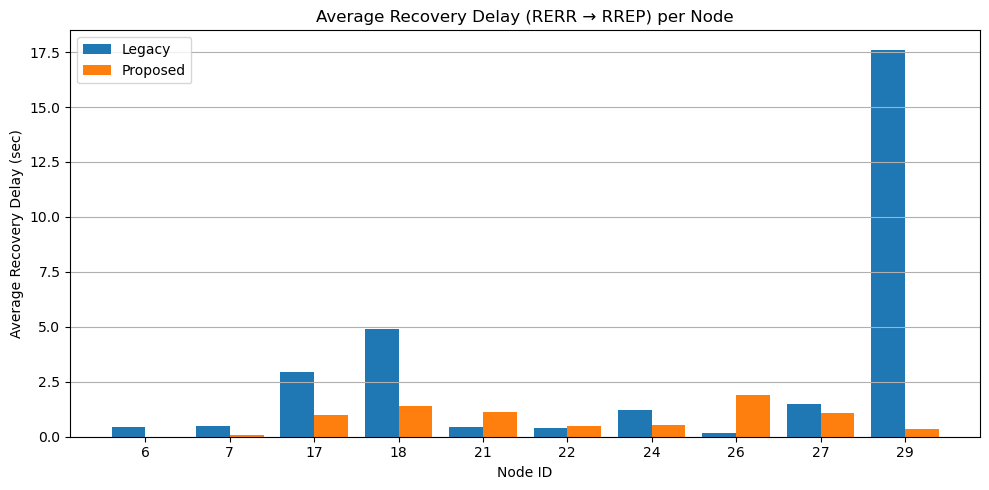

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def calculate_recovery_delay(log_path):
    df = pd.read_csv(log_path, header=None, names=["Time", "Node", "Destination", "Event"])

    delays = []
    grouped = df.groupby(["Node", "Destination"])

    for (node, dest), group in grouped:
        group = group.sort_values("Time")
        rerr_times = group[group["Event"] == "RERR_SENT"]["Time"].tolist()
        rrep_times = group[group["Event"] == "RREP_RECV"]["Time"].tolist()

        i = j = 0
        while i < len(rerr_times) and j < len(rrep_times):
            if rrep_times[j] > rerr_times[i]:
                delays.append(rrep_times[j] - rerr_times[i])
                i += 1
                j += 1
            else:
                j += 1

    return delays

xnodes = [0, 4, 6, 7, 9, 10, 11, 17, 19, 20]
nodes = [6, 7, 17, 18, 21, 22, 24, 26, 27, 29]
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도/고속/"

legacy_avgs = []
proposed_avgs = []
valid_node_labels = []

print("=== 평균 복구 지연 (RERR → RREP) ===")
for node_id in nodes:
    legacy_log = os.path.join(base_path, "기존", str(node_id), "recovery_log.csv")
    proposed_log = os.path.join(base_path, "제안", str(node_id), "recovery_log.csv")

    if not os.path.exists(legacy_log) or not os.path.exists(proposed_log):
        continue

    legacy_delays = calculate_recovery_delay(legacy_log)
    proposed_delays = calculate_recovery_delay(proposed_log)

    legacy_avg = sum(legacy_delays)/len(legacy_delays) if legacy_delays else None
    proposed_avg = sum(proposed_delays)/len(proposed_delays) if proposed_delays else None

    legacy_str = f"{legacy_avg:.6f}초" if legacy_avg is not None else "N/A"
    proposed_str = f"{proposed_avg:.6f}초" if proposed_avg is not None else "N/A"

    print(f"[Node {node_id}] Legacy: {legacy_str} | Proposed: {proposed_str}")

    if legacy_avg is not None and proposed_avg is not None:
        legacy_avgs.append(legacy_avg)
        proposed_avgs.append(proposed_avg)
        valid_node_labels.append(str(node_id))

import numpy as np
x = np.arange(len(valid_node_labels))
bar_width = 0.4

plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, legacy_avgs, width=bar_width, label='Legacy')
plt.bar(x + bar_width/2, proposed_avgs, width=bar_width, label='Proposed')

plt.xticks(x, valid_node_labels)
plt.xlabel("Node ID")
plt.ylabel("Average Recovery Delay (sec)")
plt.title("Average Recovery Delay (RERR → RREP) per Node")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Legacy 전체 평균 복구 지연: 2.603286초
Proposed 전체 평균 복구 지연: 4.780493초


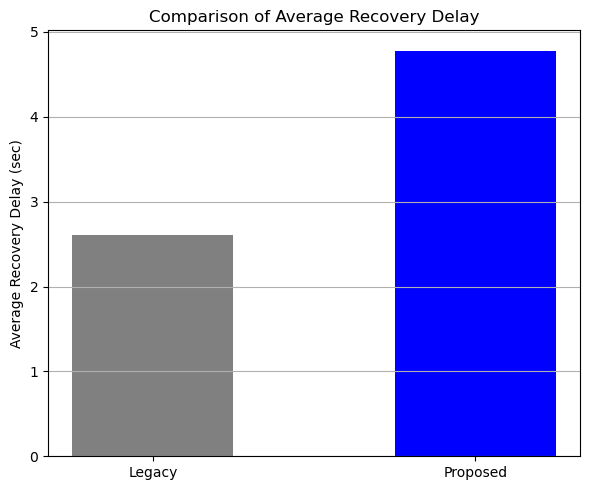

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def calculate_recovery_delay(log_path):
    df = pd.read_csv(log_path, header=None, names=["Time", "Node", "Destination", "Event"])

    delays = []
    grouped = df.groupby(["Node", "Destination"])

    for (node, dest), group in grouped:
        group = group.sort_values("Time")
        rerr_times = group[group["Event"] == "RERR_SENT"]["Time"].tolist()
        rrep_times = group[group["Event"] == "RREP_RECV"]["Time"].tolist()

        i = j = 0
        while i < len(rerr_times) and j < len(rrep_times):
            if rrep_times[j] > rerr_times[i]:
                delays.append(rrep_times[j] - rerr_times[i])
                i += 1
                j += 1
            else:
                j += 1

    return delays

nodes = [0, 4, 6, 7, 9, 10, 11, 17, 19, 20]
xnodes = [6, 7, 17, 18, 21, 22, 24, 26, 27, 29]
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/중속/"

all_legacy_delays = []
all_proposed_delays = []

for node_id in nodes:
    legacy_log = os.path.join(base_path, "기존", str(node_id), "recovery_log.csv")
    proposed_log = os.path.join(base_path, "제안", str(node_id), "recovery_log.csv")

    if not os.path.exists(legacy_log) or not os.path.exists(proposed_log):
        continue

    all_legacy_delays += calculate_recovery_delay(legacy_log)
    all_proposed_delays += calculate_recovery_delay(proposed_log)

legacy_avg = sum(all_legacy_delays) / len(all_legacy_delays) if all_legacy_delays else 0
proposed_avg = sum(all_proposed_delays) / len(all_proposed_delays) if all_proposed_delays else 0

print(f"Legacy 전체 평균 복구 지연: {legacy_avg:.6f}초")
print(f"Proposed 전체 평균 복구 지연: {proposed_avg:.6f}초")

plt.figure(figsize=(6, 5))
plt.bar(["Legacy", "Proposed"], [legacy_avg, proposed_avg], width=0.5, color=["gray", "blue"])
plt.ylabel("Average Recovery Delay (sec)")
plt.title("Comparison of Average Recovery Delay")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


=== 평균 복구 지연 (RERR → RREP) ===
[Node 0] Legacy: 5.596332초 | Proposed: 5.510804초
[Node 4] Legacy: 27.418242초 | Proposed: 0.092383초
[Node 6] Legacy: 1.357045초 | Proposed: 0.785488초
[Node 7] Legacy: N/A | Proposed: N/A
[Node 9] Legacy: 7.968900초 | Proposed: 4.090973초
[Node 10] Legacy: N/A | Proposed: N/A
[Node 11] Legacy: 0.009056초 | Proposed: N/A
[Node 17] Legacy: N/A | Proposed: N/A
[Node 19] Legacy: 0.809458초 | Proposed: 6.577553초
[Node 20] Legacy: N/A | Proposed: 1.869916초


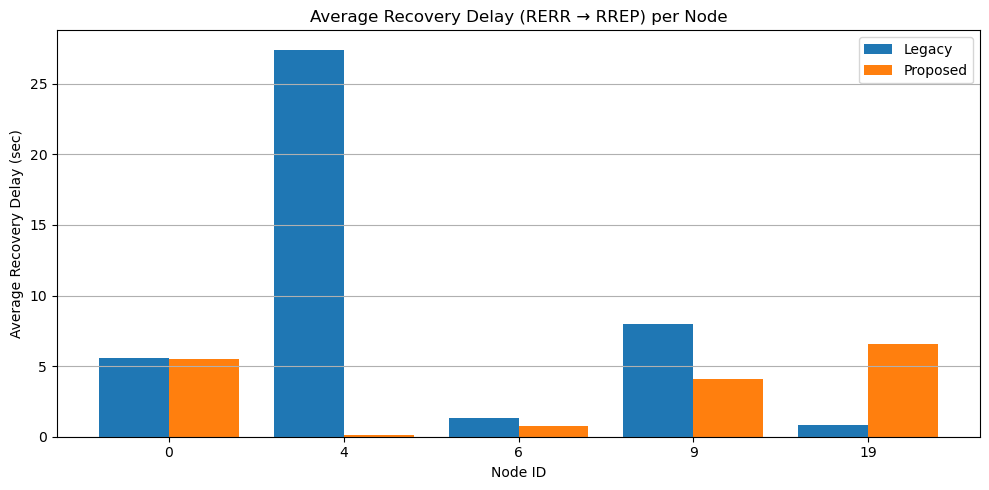

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def calculate_recovery_delay(log_path):
    df = pd.read_csv(log_path, header=None, names=["Time", "Node", "Destination", "Event"])

    delays = []
    grouped = df.groupby(["Node", "Destination"])

    for (node, dest), group in grouped:
        group = group.sort_values("Time")
        rerr_times = group[group["Event"] == "RERR_SENT"]["Time"].tolist()
        rrep_times = group[group["Event"] == "RREP_RECV"]["Time"].tolist()

        i = j = 0
        while i < len(rerr_times) and j < len(rrep_times):
            if rrep_times[j] > rerr_times[i]:
                delays.append(rrep_times[j] - rerr_times[i])
                i += 1
                j += 1
            else:
                j += 1

    return delays

nodes = [0, 4, 6, 7, 9, 10, 11, 17, 19, 20]
xnodes = [6, 7, 17, 18, 21, 22, 24, 26, 27, 29]
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/저속/"

legacy_avgs = []
proposed_avgs = []
valid_node_labels = []

print("=== 평균 복구 지연 (RERR → RREP) ===")
for node_id in nodes:
    legacy_log = os.path.join(base_path, "기존", str(node_id), "recovery_log.csv")
    proposed_log = os.path.join(base_path, "제안", str(node_id), "recovery_log.csv")

    if not os.path.exists(legacy_log) or not os.path.exists(proposed_log):
        continue

    legacy_delays = calculate_recovery_delay(legacy_log)
    proposed_delays = calculate_recovery_delay(proposed_log)

    legacy_avg = sum(legacy_delays)/len(legacy_delays) if legacy_delays else None
    proposed_avg = sum(proposed_delays)/len(proposed_delays) if proposed_delays else None

    legacy_str = f"{legacy_avg:.6f}초" if legacy_avg is not None else "N/A"
    proposed_str = f"{proposed_avg:.6f}초" if proposed_avg is not None else "N/A"

    print(f"[Node {node_id}] Legacy: {legacy_str} | Proposed: {proposed_str}")

    if legacy_avg is not None and proposed_avg is not None:
        legacy_avgs.append(legacy_avg)
        proposed_avgs.append(proposed_avg)
        valid_node_labels.append(str(node_id))

import numpy as np
x = np.arange(len(valid_node_labels))
bar_width = 0.4

plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, legacy_avgs, width=bar_width, label='Legacy')
plt.bar(x + bar_width/2, proposed_avgs, width=bar_width, label='Proposed')

plt.xticks(x, valid_node_labels)
plt.xlabel("Node ID")
plt.ylabel("Average Recovery Delay (sec)")
plt.title("Average Recovery Delay (RERR → RREP) per Node")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


=== NextHop Change Rate (based on actual columns) ===
[Node 0] Legacy: 1.17% | Proposed: 1.10%
[Node 4] Legacy: 0.41% | Proposed: 0.28%
[Node 6] Legacy: 0.33% | Proposed: 0.72%
[Node 7] Legacy: 0.05% | Proposed: 0.05%
[Node 9] Legacy: 1.67% | Proposed: 1.94%
[Node 10] Legacy: 0.24% | Proposed: 0.54%
[Node 11] Legacy: 0.61% | Proposed: 0.82%
[Node 17] Legacy: 0.95% | Proposed: 1.01%
[Node 19] Legacy: 1.39% | Proposed: 1.74%
[Node 20] Legacy: 0.37% | Proposed: 0.57%


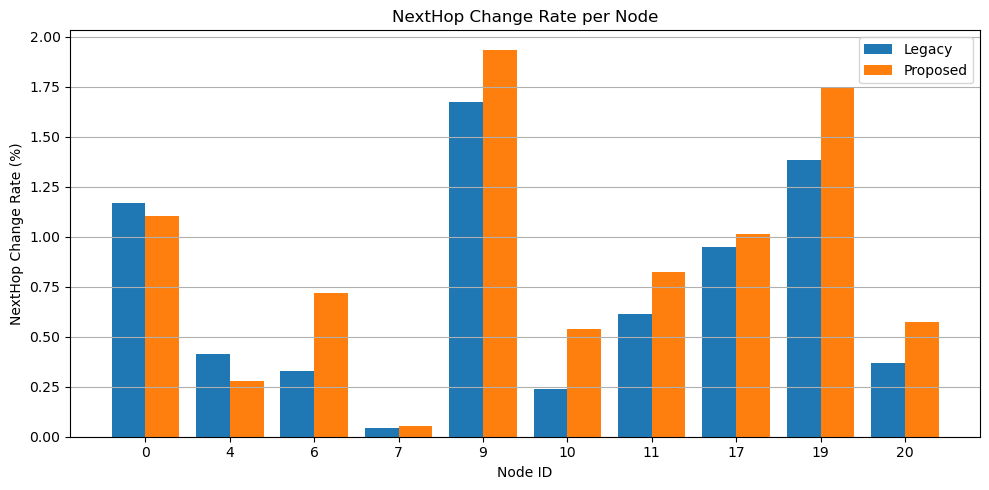

In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def calculate_nexthop_change_rate(log_path):
    df = pd.read_csv(log_path)
    if df.empty or "Previous_NextHop" not in df.columns or "New_NextHop" not in df.columns:
        return None

    changed = df[df["Previous_NextHop"] != df["New_NextHop"]]
    total = len(df)

    if total == 0:
        return None
    return len(changed) / total

nodes = [0, 4, 6, 7, 9, 10, 11, 17, 19, 20]
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/중속/"

legacy_rates = []
proposed_rates = []
valid_node_labels = []

print("=== NextHop Change Rate (based on actual columns) ===")
for node_id in nodes:
    legacy_log = os.path.join(base_path, "기존", str(node_id), "aodv_routing_log.csv")
    proposed_log = os.path.join(base_path, "제안", str(node_id), "aodv_routing_log.csv")

    if not os.path.exists(legacy_log) or not os.path.exists(proposed_log):
        continue

    legacy_rate = calculate_nexthop_change_rate(legacy_log)
    proposed_rate = calculate_nexthop_change_rate(proposed_log)

    legacy_str = f"{legacy_rate*100:.2f}%" if legacy_rate is not None else "N/A"
    proposed_str = f"{proposed_rate*100:.2f}%" if proposed_rate is not None else "N/A"

    print(f"[Node {node_id}] Legacy: {legacy_str} | Proposed: {proposed_str}")

    if legacy_rate is not None and proposed_rate is not None:
        legacy_rates.append(legacy_rate * 100)
        proposed_rates.append(proposed_rate * 100)
        valid_node_labels.append(str(node_id))

x = np.arange(len(valid_node_labels))
bar_width = 0.4

plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, legacy_rates, width=bar_width, label='Legacy')
plt.bar(x + bar_width/2, proposed_rates, width=bar_width, label='Proposed')

plt.xticks(x, valid_node_labels)
plt.xlabel("Node ID")
plt.ylabel("NextHop Change Rate (%)")
plt.title("NextHop Change Rate per Node")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
from collections import defaultdict

def classify_changes_and_rrep_success(aodv_log_path, recovery_log_path, interval=1.0):
    aodv_df = pd.read_csv(aodv_log_path)
    reco_df = pd.read_csv(recovery_log_path, header=None, names=["Time", "Node", "Destination", "Event"])
    reco_df = reco_df[reco_df["Event"] == "RREP_RECV"]

    result = {
        "Hop+NextHop": {"total": 0, "success": 0},
        "HopOnly": {"total": 0, "success": 0},
        "NextHopOnly": {"total": 0, "success": 0},
    }

    for _, row in aodv_df.iterrows():
        node = str(row["Node"])
        dest = row["Destination"]
        time = float(row["Time"])

        prev_hop = row["Previous_HopCount"]
        new_hop = row["New_HopCount"]
        prev_nh = row["Previous_NextHop"]
        new_nh = row["New_NextHop"]

        if pd.isna(prev_hop) or pd.isna(new_hop) or pd.isna(prev_nh) or pd.isna(new_nh):
            continue

        hop_changed = prev_hop != new_hop
        nh_changed = prev_nh != new_nh

        if hop_changed and nh_changed:
            change_type = "Hop+NextHop"
        elif hop_changed:
            change_type = "HopOnly"
        elif nh_changed:
            change_type = "NextHopOnly"
        else:
            continue

        result[change_type]["total"] += 1

        # check if RREP_RECV occurred within interval seconds
        sub_reco = reco_df[(reco_df["Node"] == node) & (reco_df["Destination"] == dest)]
        future_rrep = sub_reco[sub_reco["Time"] > time]
        if not future_rrep.empty and (future_rrep["Time"].iloc[0] - time <= interval):
            result[change_type]["success"] += 1

    return result

nodes = [0, 4, 6, 7, 9, 10, 11, 17, 19, 20]
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/저속/"

legacy_summary = defaultdict(lambda: {"total": 0, "success": 0})
proposed_summary = defaultdict(lambda: {"total": 0, "success": 0})

for node_id in nodes:
    legacy_aodv = os.path.join(base_path, "기존", str(node_id), "aodv_routing_log.csv")
    legacy_reco = os.path.join(base_path, "기존", str(node_id), "recovery_log.csv")
    proposed_aodv = os.path.join(base_path, "제안", str(node_id), "aodv_routing_log.csv")
    proposed_reco = os.path.join(base_path, "제안", str(node_id), "recovery_log.csv")

    if not all(os.path.exists(p) for p in [legacy_aodv, legacy_reco, proposed_aodv, proposed_reco]):
        continue

    legacy = classify_changes_and_rrep_success(legacy_aodv, legacy_reco)
    proposed = classify_changes_and_rrep_success(proposed_aodv, proposed_reco)

    for k in legacy:
        legacy_summary[k]["total"] += legacy[k]["total"]
        legacy_summary[k]["success"] += legacy[k]["success"]
    for k in proposed:
        proposed_summary[k]["total"] += proposed[k]["total"]
        proposed_summary[k]["success"] += proposed[k]["success"]

print("=== RREP Success Rate by Change Type ===")
for change_type in ["Hop+NextHop", "HopOnly", "NextHopOnly"]:
    l_total = legacy_summary[change_type]["total"]
    l_success = legacy_summary[change_type]["success"]
    p_total = proposed_summary[change_type]["total"]
    p_success = proposed_summary[change_type]["success"]

    l_rate = f"{(l_success/l_total)*100:.2f}%" if l_total > 0 else "N/A"
    p_rate = f"{(p_success/p_total)*100:.2f}%" if p_total > 0 else "N/A"

    print(f"[{change_type}] Legacy: {l_rate} ({l_success}/{l_total}) | Proposed: {p_rate} ({p_success}/{p_total})")
